In [ ]:
import os
import time
from ctypes import *
from enum import Enum

def bitToNTU(bit):
    return round(bit*10/65536,3)

def NTUToBit(ntu):
    return ntu*65536/10

## params
deviseListSize = 1
leftNanoTrakAddr = c_char_p(b'57328344')
leftPiezoAddr = c_char_p(b'29251813')
leftStrainGaugeAddr = c_char_p(b'59001247')

## import libraries
os.add_dll_directory(r'C:\Program Files\Thorlabs\Kinesis')
NanoTrakLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.NanoTrak.dll')
PiezoLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.Piezo.dll')
StrainGaugeLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.StrainGauge.dll')

## class enums, from the header file
class NT_HVComponent(Structure): 
    _fields_ = [('horizontalComponent', c_ushort),
                ('verticalComponent', c_ushort)]

class NT_CircleParameters(Structure): 
    _fields_ = [('mode', c_ushort),
                ('diameter', c_ushort),
                ('samplesPerRevolution', c_ushort),
                ('minDiameter', c_ushort),
                ('maxDiameter', c_ushort),
                ('algorithmAdjustment', c_ushort)]

## initialize
# NanoTrakLeft.TLI_InitializeSimulations() ## seems irrelevant
if NanoTrakLeft.TLI_BuildDeviceList() == 0:
    deviceListSize = NanoTrakLeft.TLI_GetDeviceListSize()
    print('num of device(s): {}'.format(deviceListSize))

if deviceListSize != 0:
    # leftNanoTrakAddr = c_char_p(leftNanoTrakAddr) ## set up serial number variable
    # print(NanoTrakLeft.NT_Open(leftNanoTrakAddr)) ## return zero if successful

    ## if able to open, do
    if NanoTrakLeft.NT_Open(leftNanoTrakAddr) == 0:
        NanoTrakLeft.NT_StartPolling(leftNanoTrakAddr, 200) ## poll
        time.sleep(1)

        ## latch and set to home pos
        pos_home = NT_HVComponent(round(NTUToBit(5)), round(NTUToBit(5)))
        NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 2) ## set mode to latch
        NanoTrakLeft.NT_SetCircleHomePosition(leftNanoTrakAddr, byref(pos_home)) ## set home pos
        # NanoTrakLeft.NT_HomeCircle(leftNanoTrakAddr) ## move to home pos, please dont do this
        time.sleep(1)

        ## init
        mode_curr = NanoTrakLeft.NT_GetMode(leftNanoTrakAddr) ## get curr mode
        pos_curr = NT_HVComponent(0, 0); NanoTrakLeft.NT_GetCirclePosition(leftNanoTrakAddr, byref(pos_curr)) ## get curr pos
        cir_curr = NT_CircleParameters(0,0,0,0,0,0); NanoTrakLeft.NT_GetCircleParams(leftNanoTrakAddr, byref(cir_curr)) ## get curr circ params
        NanoTrakLeft.NT_SetCircleDiameter(leftNanoTrakAddr, c_ushort(round(NTUToBit(0.75)))) ## set circ dia to 1 NTU
        time.sleep(1); dia_curr = NanoTrakLeft.NT_GetCircleDiameter(leftNanoTrakAddr)

        print('INIT \nmode: {}, dia: {}, horz: {}, vert: {}\nMAIN'.format(mode_curr, bitToNTU(dia_curr), bitToNTU(pos_curr.horizontalComponent), bitToNTU(pos_curr.verticalComponent)))
        NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 3) ## set mode to track

        ## main
        i = 0
        while i <= 5:
            mode_curr = NanoTrakLeft.NT_GetMode(leftNanoTrakAddr) ## get curr mode
            NanoTrakLeft.NT_GetCirclePosition(leftNanoTrakAddr, byref(pos_curr)) # get curr rel pos
            dia_curr = NanoTrakLeft.NT_GetCircleDiameter(leftNanoTrakAddr) ## get curr dia

            print('mode: {}, dia: {}, ver: {}, hor: {}'.format(mode_curr, bitToNTU(dia_curr), bitToNTU(pos_curr.horizontalComponent), bitToNTU(pos_curr.verticalComponent)))
            NanoTrakLeft.NT_SetCircleDiameter(leftNanoTrakAddr, c_ushort(round(NTUToBit(0.75-(0.01*i))))) ## trial with (0.75-i) NTU
            time.sleep(0.5)
            i += 1
        
        NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 2) ## set mode back to latch
        NanoTrakLeft.NT_Close(leftNanoTrakAddr); print('left NT closed')
    else: print('cant connect!')
else: print('cant connect!')


In [ ]:
def bitToNTU(bit):
    return round(bit*10/65536,3)
def NTUToBit(ntu):
    return ntu*65536/10
def bitToPer(bit):
    return round(bit*100/65536,3)
def perToBit(per):
    return per*65536/100

In [ ]:
# import os
# import time
# from ctypes import *
# from datetime import datetime

# def bitToNTU(bit):
#     return round(bit*10/65536,3)
# def NTUToBit(ntu):
#     return ntu*65536/10
# def bitToPer(bit):
#     return round(bit*100/65536,3)
# def perToBit(per):
#     return per*65536/100

# ## params
# deviceListSize = 1
# leftNanoTrakAddr = c_char_p(b'57328344')
# leftPiezoAddr = c_char_p(b'29251813')
# leftStrainGaugeAddr = c_char_p(b'59001247')

# ## import libraries
# os.add_dll_directory(r'C:\Program Files\Thorlabs\Kinesis')
# NanoTrakLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.NanoTrak.dll')
# PiezoLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.Piezo.dll')
# StrainGaugeLeft = cdll.LoadLibrary('Thorlabs.MotionControl.KCube.StrainGauge.dll')

# ## class enums, from the header file
# class NT_HVComponent(Structure): 
#     _fields_ = [('horizontalComponent', c_ushort),
#                 ('verticalComponent', c_ushort)]
# class NT_CircleParameters(Structure): 
#     _fields_ = [('mode', c_ushort),
#                 ('diameter', c_ushort),
#                 ('samplesPerRevolution', c_ushort),
#                 ('minDiameter', c_ushort),
#                 ('maxDiameter', c_ushort),
#                 ('algorithmAdjustment', c_ushort)]

# ## initialize
# if NanoTrakLeft.TLI_BuildDeviceList() == 0:
#     deviceListSize = NanoTrakLeft.TLI_GetDeviceListSize()
#     print(str(datetime.now()) + '   Trying to connect to left piezos...')

# if deviceListSize != 0:
#     if (NanoTrakLeft.NT_Open(leftNanoTrakAddr) and PiezoLeft.PCC_Open(leftPiezoAddr) and StrainGaugeLeft.SG_Open(leftStrainGaugeAddr)) == 0:
#         ## poll all
#         NanoTrakLeft.NT_StartPolling(leftNanoTrakAddr, 10)
#         StrainGaugeLeft.SG_StartPolling(leftStrainGaugeAddr, 10)
#         PiezoLeft.PCC_StartPolling(leftPiezoAddr, 10)
#         time.sleep(0.5)

#         ## load default settings
#         PiezoLeft.PCC_LoadSettings(leftPiezoAddr)
#         StrainGaugeLeft.SG_LoadSettings(leftStrainGaugeAddr)

#         ## nanotrak: latch and set home pos
#         pos_home = NT_HVComponent(round(NTUToBit(5)), round(NTUToBit(5)))
#         NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 2) ## set mode to latch
#         NanoTrakLeft.NT_SetCircleHomePosition(leftNanoTrakAddr, byref(pos_home)) ## set home pos

#         ## strain gauge: enable
#         StrainGaugeLeft.SG_Enable(leftStrainGaugeAddr); time.sleep(0.5)

#         ## check and set piezo to close loop
#         if PiezoLeft.PCC_GetPositionControlMode(leftPiezoAddr) != 2 :
#             PiezoLeft.PCC_SetPositionControlMode(leftPiezoAddr, 2); time.sleep(0.5)

#         ## enable piezo, then check set piezo to 20%
#         PiezoLeft.PCC_Enable(leftPiezoAddr); time.sleep(3)
#         if round(bitToPer(PiezoLeft.PCC_GetPosition(leftPiezoAddr)),2) <= 20:
#             PiezoLeft.PCC_SetPosition(leftPiezoAddr, c_ushort(round(perToBit(20)))); time.sleep(0.5)
#         print(str(datetime.now()) + '   Current left piezo X position: ' + str(round(bitToPer(PiezoLeft.PCC_GetPosition(leftPiezoAddr)),3)))

#         ## nanotrak: init
#         mode_curr = NanoTrakLeft.NT_GetMode(leftNanoTrakAddr) ## get curr mode
#         pos_curr = NT_HVComponent(0, 0); NanoTrakLeft.NT_GetCirclePosition(leftNanoTrakAddr, byref(pos_curr)) ## get curr pos
#         cir_curr = NT_CircleParameters(0,0,0,0,0,0); NanoTrakLeft.NT_GetCircleParams(leftNanoTrakAddr, byref(cir_curr)) ## get curr circ params
#         NanoTrakLeft.NT_SetCircleDiameter(leftNanoTrakAddr, c_ushort(round(NTUToBit(0.75)))) ## set circ dia to 0.75 NTU
#         time.sleep(1); dia_curr = NanoTrakLeft.NT_GetCircleDiameter(leftNanoTrakAddr)

#         NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 3); time.sleep(2); NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 2) ## track and latch
#         print(str(datetime.now()) + '   Left piezos connected, configured, track and latched!')



#         # ## main
#         # i = 0
#         # while i <= 5:
#         #     mode_curr = NanoTrakLeft.NT_GetMode(leftNanoTrakAddr) ## get curr mode
#         #     NanoTrakLeft.NT_GetCirclePosition(leftNanoTrakAddr, byref(pos_curr)) # get curr rel pos
#         #     dia_curr = NanoTrakLeft.NT_GetCircleDiameter(leftNanoTrakAddr) ## get curr dia

#         #     print('mode: {}, dia: {}, ver: {}, hor: {}'.format(mode_curr, bitToNTU(dia_curr), bitToNTU(pos_curr.horizontalComponent), bitToNTU(pos_curr.verticalComponent)))
#         #     # NanoTrakLeft.NT_SetCircleDiameter(leftNanoTrakAddr, c_ushort(round(NTUToBit(0.75-(0.01*i))))) ## trial with (0.75-i) NTU
#         #     time.sleep(1)
#         #     i += 1
#     else: print('cant connect!')
# else: print('cant find!')

# PiezoLeft.PCC_SetPositionControlMode(leftPiezoAddr, 2) ## stay in closed loop
# PiezoLeft.PCC_SetPosition(leftPiezoAddr, c_ushort(round(perToBit(20)))) ## but set back to 20%
# StrainGaugeLeft.SG_Close(leftStrainGaugeAddr); PiezoLeft.PCC_Close(leftPiezoAddr)
# NanoTrakLeft.NT_SetMode(leftNanoTrakAddr, 2) ## set mode back to latch
# NanoTrakLeft.NT_Close(leftNanoTrakAddr)
# print('all closed')

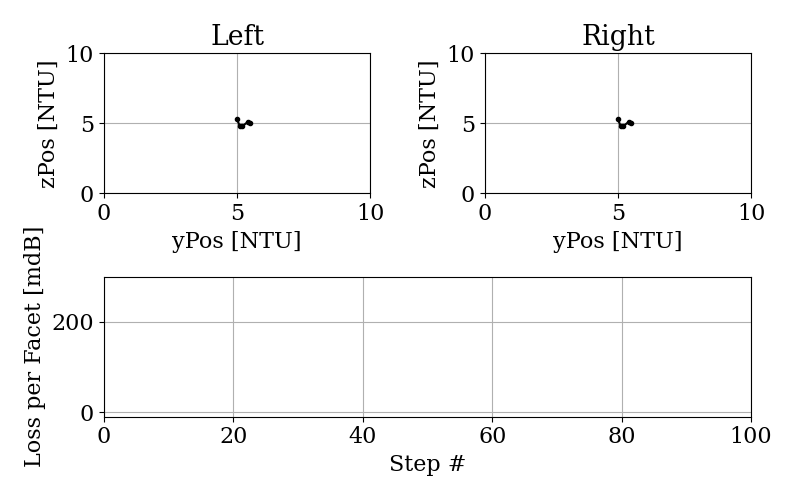

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time

plt.rcParams["figure.autolayout"] = True; plt.rc('font', size=16)
plt.rc('text', usetex=False); plt.rc('font', family='serif'); plt.rcParams["figure.figsize"] = (8, 5)

class Stacks(list):
    def __init__(self, maxSize):
        super().__init__()
        self.maxSize = maxSize

    def init(self, element):
        for i in range(self.maxSize):
            self.append(element)

    def push(self, element):
        self.append(element)
    
    def append(self, element):
        super().append(element)
        if super().__len__() > self.maxSize:
            super().__delitem__(0)

## init
nSteps = 100
xData = Stacks(nSteps); yData = Stacks(nSteps); yData.init(0); xData.init(0)
yPos = Stacks(5); zPos = Stacks(5); yPos.init(5); zPos.init(5)

## matplotlib init
matplotlib.use('TkAgg') ## plot real time outside vscode
figHandler = plt.figure()
axHandler1 = plt.subplot(221)
trial1, = axHandler1.plot(yPos, zPos, '.-k')
axHandler1.grid(True); axHandler1.set_xlabel('yPos [NTU]'); axHandler1.set_ylabel('zPos [NTU]')
axHandler1.set_ylim([0, 10]); axHandler1.set_xlim([0, 10]); axHandler1.set_title('Left')

axHandler2 = plt.subplot(222)
trial2, = axHandler2.plot(yPos, zPos, '.-k')
axHandler2.grid(True); axHandler2.set_xlabel('yPos [NTU]'); axHandler2.set_ylabel('zPos [NTU]')
axHandler2.set_ylim([0, 10]); axHandler2.set_xlim([0, 10]); axHandler2.set_title('Right')

axHandler3 = plt.subplot(212)
trial3, = axHandler3.plot(xData, yData, '.-k')
axHandler3.grid(True); axHandler3.set_xlabel('Step #'); axHandler3.set_ylabel('Loss per Facet [mdB]')
axHandler3.set_ylim([-10, 300]); axHandler3.set_xlim([0, 2*nSteps])
plt.show()

## main
i = 0
while i <= 2*nSteps:
    # for i in range(nSteps):
    yPos.append(random.randint(45,55)*0.1); zPos.append(random.randint(45,55)*0.1)
    xData.append(i+1); yData.append(random.randint(0,nSteps*2))
    
    ## update
    trial1.set_xdata(yPos); trial1.set_ydata(zPos)
    trial2.set_xdata(yPos); trial2.set_ydata(zPos)
    trial3.set_xdata(xData); trial3.set_ydata(yData)
    
    figHandler.canvas.draw(); figHandler.canvas.flush_events()
    i += 1
    time.sleep(0.01)
plt.close()

## replot inside vscode
%matplotlib widget
figHandler = plt.figure()
axHandler1 = plt.subplot(221)
trial1, = axHandler1.plot(yPos, zPos, '.-k')
axHandler1.grid(True); axHandler1.set_xlabel('yPos [NTU]'); axHandler1.set_ylabel('zPos [NTU]')
axHandler1.set_ylim([0, 10]); axHandler1.set_xlim([0, 10]); axHandler1.set_title('Left')

axHandler2 = plt.subplot(222)
trial2, = axHandler2.plot(yPos, zPos, '.-k')
axHandler2.grid(True); axHandler2.set_xlabel('yPos [NTU]'); axHandler2.set_ylabel('zPos [NTU]')
axHandler2.set_ylim([0, 10]); axHandler2.set_xlim([0, 10]); axHandler2.set_title('Right')

axHandler3 = plt.subplot(212)
trial3, = axHandler3.plot(xData, yData, '.-k')
axHandler3.grid(True); axHandler3.set_xlabel('Step #'); axHandler3.set_ylabel('Loss per Facet [mdB]')
axHandler3.set_ylim([-10, 300]); axHandler3.set_xlim([0, nSteps])
plt.show()